# TASK

## Perform customer segmentation using clustering techniques (e.g. , K-Means) on a retail dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel("D:/online_retail_II.xlsx", sheet_name = 'Year 2009-2010')
df2 = pd.read_excel("D:/online_retail_II.xlsx", sheet_name = 'Year 2010-2011')
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object  

In [3]:
df = pd.concat([df1, df2], ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [4]:
print('Before:', df.shape)
df = df.drop_duplicates()
print('After:', df.shape)

Before: (1067371, 8)
After: (1033036, 8)


In [5]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [6]:
print(df[df['Customer ID'].isnull()])

        Invoice StockCode                     Description  Quantity  \
263      489464     21733                    85123a mixed       -96   
283      489463     71477                           short      -240   
284      489467    85123A                     21733 mixed      -192   
470      489521     21646                             NaN       -50   
577      489525    85226C       BLUE PULL BACK RACING CAR         1   
...         ...       ...                             ...       ...   
1066997  581498    85099B         JUMBO BAG RED RETROSPOT         5   
1066998  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
1066999  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
1067000  581498     85174               S/4 CACTI CANDLES         1   
1067001  581498       DOT                  DOTCOM POSTAGE         1   

                InvoiceDate    Price  Customer ID         Country  
263     2009-12-01 10:52:00     0.00          NaN  United Kingdom  
283     200

In [7]:
df = df[df['Customer ID'].notnull()]
df['Customer ID'] = df['Customer ID'].astype(int)
print(df['Customer ID'].dtype)

int64


In [8]:
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In [9]:
df['TotalSales'] = df['Quantity'] * df['Price']
print(df['TotalSales'])

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Name: TotalSales, Length: 779425, dtype: float64


In [10]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days = 1)
print(snapshot_date)

2011-12-10 12:50:00


In [11]:
rfm = df.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalSales': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm)

      CustomerID  Recency  Frequency  Monetary
0          12346      326         12  77556.46
1          12347        2          8   4921.53
2          12348       75          5   2019.40
3          12349       19          4   4428.69
4          12350      310          1    334.40
...          ...      ...        ...       ...
5873       18283        4         22   2664.90
5874       18284      432          1    461.68
5875       18285      661          1    427.00
5876       18286      477          2   1296.43
5877       18287       43          7   4182.99

[5878 rows x 4 columns]


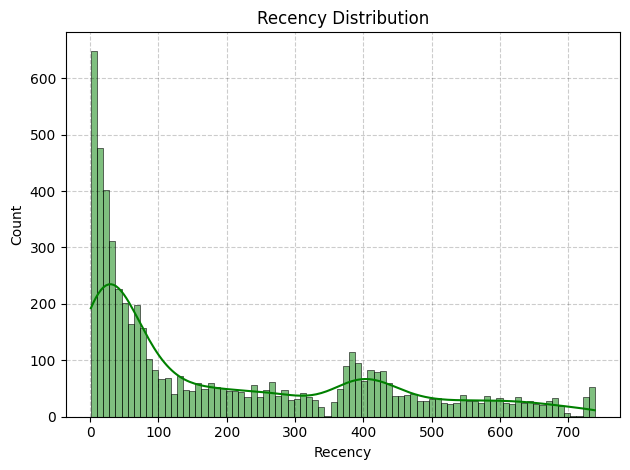

In [12]:
sns.histplot(rfm['Recency'], bins = 30, binwidth = 9, kde = True, color = 'green')
plt.title('Recency Distribution')
plt.grid(linestyle = '--' , alpha = 0.2, color = 'black')
plt.tight_layout()
plt.savefig("Recency Distribution", dpi = 300)
plt.show()

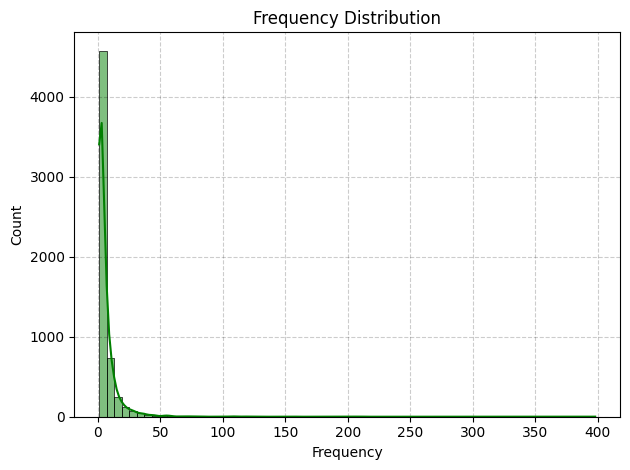

In [13]:
sns.histplot(rfm['Frequency'], bins = 30, binwidth = 6, kde = True, color = 'green')
plt.title('Frequency Distribution')
plt.grid(linestyle = '--' , alpha = 0.2, color = 'black')
plt.tight_layout()
plt.savefig("Frequency Distribution", dpi = 300)
plt.show()

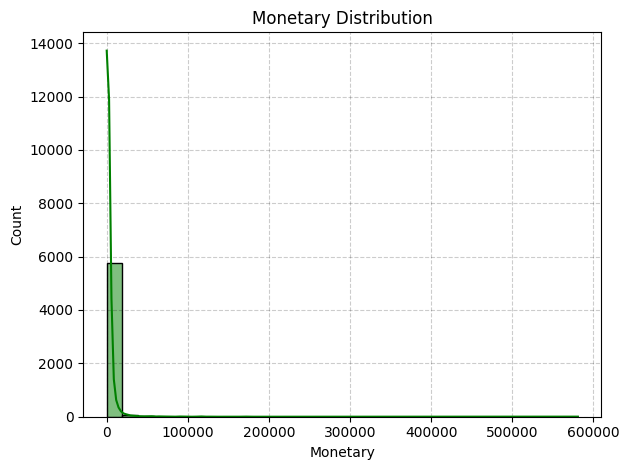

In [14]:
sns.histplot(rfm['Monetary'], bins = 30, kde = True, color = 'green')
plt.title('Monetary Distribution')
plt.grid(linestyle = '--' , alpha = 0.2, color = 'black')
plt.tight_layout()
plt.savefig("Monetary Distribution", dpi = 300)
plt.show()

In [15]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
print(rfm_scaled)

[[ 0.59558355  0.43899789  5.16637792]
 [-0.95227909  0.13150188  0.13612722]
 [-0.60353226 -0.09912012 -0.06485654]
 ...
 [ 2.19599709 -0.40661612 -0.17513642]
 [ 1.31696398 -0.32974212 -0.11492502]
 [-0.75640758  0.05462788  0.08498046]]


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 1)
rfm['Cluster']= kmeans.fit_predict(rfm_scaled)

In [17]:
print(type(rfm_scaled))
print(rfm_scaled[:5])

<class 'numpy.ndarray'>
[[ 0.59558355  0.43899789  5.16637792]
 [-0.95227909  0.13150188  0.13612722]
 [-0.60353226 -0.09912012 -0.06485654]
 [-0.87106408 -0.17599412  0.10199614]
 [ 0.51914589 -0.40661612 -0.18154933]]


In [18]:
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary  Cluster
0       12346      326         12  77556.46        1
1       12347        2          8   4921.53        1
2       12348       75          5   2019.40        1
3       12349       19          4   4428.69        1
4       12350      310          1    334.40        0


In [19]:
print(rfm['Cluster'].value_counts().sort_index())

Cluster
0    2001
1    3855
2      22
Name: count, dtype: int64


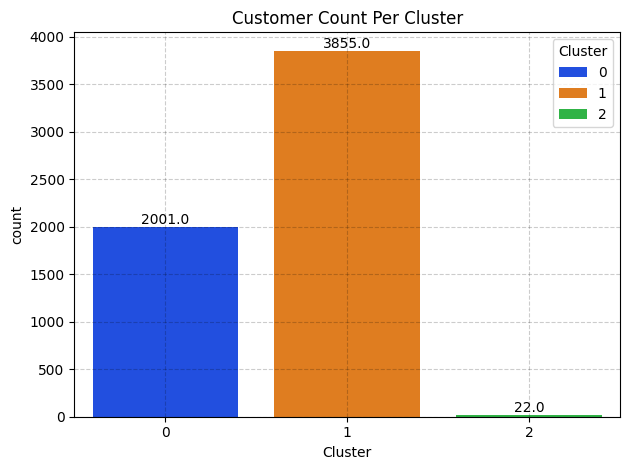

In [20]:
ax = sns.countplot(data = rfm, x = 'Cluster', hue = 'Cluster', palette = 'bright')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f', label_type = 'edge', fontsize = 10, color = 'black')
ax.grid(True, linestyle = '--' , alpha = 0.2, color = 'black' )
plt.title('Customer Count Per Cluster')
plt.tight_layout()
plt.savefig("Customer Count Per Cluster", dpi = 300)
plt.show()

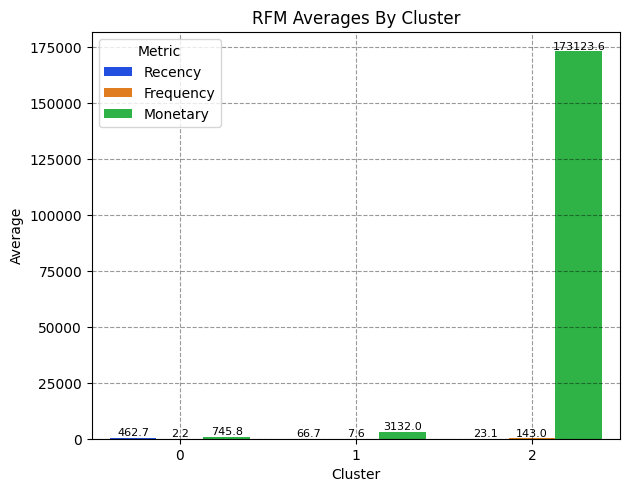

In [21]:
cluster_avg = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1).reset_index()
melted = cluster_avg.melt(id_vars = 'Cluster', var_name = 'Metric', value_name = 'Average')

ax = sns.barplot(data = melted, x = 'Cluster', y = 'Average', hue = 'Metric', palette = 'bright')
ax.grid(True, linestyle = '--' , alpha = 0.4, color = 'black' )
for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f', label_type = 'edge', fontsize = 8, color = 'black')
plt.tight_layout()
plt.title('RFM Averages By Cluster')
plt.savefig("RFM Averages By Cluster", dpi = 300)
plt.show()

In [22]:
rfm.to_csv('Customer_Segments.csv', index = False)

In [23]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

,Recency,Frequency,Monetary
Cluster,,,
0,462.7,2.2,745.8
1,66.7,7.6,3132.0
2,23.1,143.0,173123.6


# Insights

- Cluster 1 has the most no of customers. Their shopping activity is moderate, so they can be retained with regular engagement.
- Cluster 0 shows low activity in terms of both frequency and spending. These customers maybe inactive.
- Cluster 2 is the smallest group but includes high value buyers. They are loyal and recent shoppers.

# Recommendations

- Cluster 0: Try to bring them back with reactivation messages or coupons.
- Cluster 1: Use discount offers and email reminders to keep them active.
- Cluster 2: Offer loyalty rewards or early access to keep them interested.